# 1. Import Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os

# 2. Importing Data

In [2]:
# Turn project folder path into a string
path = r'/Users/thomasradio/Documents/Jupyter/230808 Tom Radio Achievement 6 Project'

In [3]:
# Check path
path

'/Users/thomasradio/Documents/Jupyter/230808 Tom Radio Achievement 6 Project'

In [4]:
# Import puget sound currents dataset
pugetsound_currents = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'PugetSound_Currents.csv'))

In [5]:
pugetsound_currents.head()

,Date_Time (LST/LDT),Event,Speed (knots),Dive Site,Current Station Name,Current Station ID,Latitude,Longitude
0,1/1/24 0:48,slack,-,Deception Pass,Deception Pass Narrows,PUG1701,48.405722,-122.6449
1,1/1/24 3:18,flood,4,Deception Pass,Deception Pass Narrows,PUG1701,48.405722,-122.6449
2,1/1/24 6:42,slack,-,Deception Pass,Deception Pass Narrows,PUG1701,48.405722,-122.6449
3,1/1/24 9:30,ebb,-5.3,Deception Pass,Deception Pass Narrows,PUG1701,48.405722,-122.6449
4,1/1/24 13:42,slack,-,Deception Pass,Deception Pass Narrows,PUG1701,48.405722,-122.6449


In [6]:
pugetsound_currents.tail()

,Date_Time (LST/LDT),Event,Speed (knots),Dive Site,Current Station Name,Current Station ID,Latitude,Longitude
10995,12/31/24 9:42,ebb,-2.5,Tacoma Narrows,"The Narrows, North",PUG4350,47.265336,-122.544439
10996,12/31/24 12:36,slack,-,Tacoma Narrows,"The Narrows, North",PUG4351,47.265336,-122.544439
10997,12/31/24 14:36,flood,2.2,Tacoma Narrows,"The Narrows, North",PUG4352,47.265336,-122.544439
10998,12/31/24 16:54,slack,-,Tacoma Narrows,"The Narrows, North",PUG4353,47.265336,-122.544439
10999,12/31/24 20:48,ebb,-5,Tacoma Narrows,"The Narrows, North",PUG4354,47.265336,-122.544439


In [7]:
pugetsound_currents.shape

(11000, 8)

In [8]:
pugetsound_currents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date_Time (LST/LDT)   11000 non-null  object 
 1    Event                11000 non-null  object 
 2    Speed (knots)        11000 non-null  object 
 3   Dive Site             11000 non-null  object 
 4   Current Station Name  11000 non-null  object 
 5   Current Station ID    11000 non-null  object 
 6   Latitude              11000 non-null  float64
 7   Longitude             11000 non-null  float64
dtypes: float64(2), object(6)
memory usage: 687.6+ KB


In [9]:
pugetsound_currents.dtypes

Date_Time (LST/LDT)      object
 Event                   object
 Speed (knots)           object
Dive Site                object
Current Station Name     object
Current Station ID       object
Latitude                float64
Longitude               float64
dtype: object

In [10]:
pugetsound_currents.describe()

,Latitude,Longitude
count,11000.000000,11000.000000
mean,47.853540,-122.805871
std,0.456309,0.511353
min,47.265336,-123.704473
25%,47.265336,-122.644900
50%,47.588707,-122.544439
75%,48.405722,-122.544439
max,48.405722,-122.380009


# 3. Data Cleaning

In [11]:
# Splitting Date_Time column into separate date and time columns
pugetsound_currents[['Date', 'Time']] = pugetsound_currents['Date_Time (LST/LDT)'].str.split(' ', expand=True)

In [12]:
# Dropping the original Date_Time column
pugetsound_currents.drop(columns=['Date_Time (LST/LDT)'], inplace=True)

In [14]:
# Convert the "Date" column to datetime format
pugetsound_currents['Date'] = pd.to_datetime(pugetsound_currents['Date'], format='%m/%d/%y')

# Convert the "Time" column to datetime time format
pugetsound_currents['Time'] = pd.to_datetime(pugetsound_currents['Time'], format='%H:%M').dt.time

In [19]:
# Convert the "Time" column to datetime time format
pugetsound_currents['Time'] = pd.to_datetime(pugetsound_currents['Time'], format='%H:%M:%S').dt.time

In [22]:
# Convert the "Time" column to datetime format and remove seconds
pugetsound_currents['Time'] = pd.to_datetime(pugetsound_currents['Time'], format='%H:%M:%S').dt.strftime('%H:%M')


In [27]:
# Create a new column for the day of the week
pugetsound_currents['Day of Week'] = pugetsound_currents['Date'].dt.dayofweek

# Map the integer day of the week to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pugetsound_currents['Day of Week'] = pugetsound_currents['Day of Week'].apply(lambda x: day_names[x])


In [31]:
# Remove leading spaces from column names
pugetsound_currents.columns = pugetsound_currents.columns.str.strip()

In [34]:
# Reorder columns
desired_order = ['Dive Site', 'Date', 'Day of Week', 'Time', 'Event', 'Speed (knots)', 'Current Station Name', 'Current Station ID', 'Latitude', 'Longitude']
pugetsound_currents = pugetsound_currents[desired_order]

In [36]:
# Rename columns
pugetsound_currents.rename(columns={'Dive Site': 'Dive_Site', 'Day of Week': 'Day_of_Week', 'Speed (knots)': 'Current_Speed_(knots)', 'Current Station Name': 'Current_Station_Name', 'Current Station ID': 'Current_Station_ID'}, inplace=True)

In [37]:
# Replace "-" with "0" for slack tide
pugetsound_currents['Current_Speed_(knots)'] = pugetsound_currents['Current_Speed_(knots)'].apply(lambda x: '0' if x == '-' else x)

In [40]:
pugetsound_currents.shape

(11000, 10)

In [43]:
# Convert Current_Speed_(knots) to numeric format
pugetsound_currents['Current_Speed_(knots)'] = pd.to_numeric(pugetsound_currents['Current_Speed_(knots)'], errors='coerce')

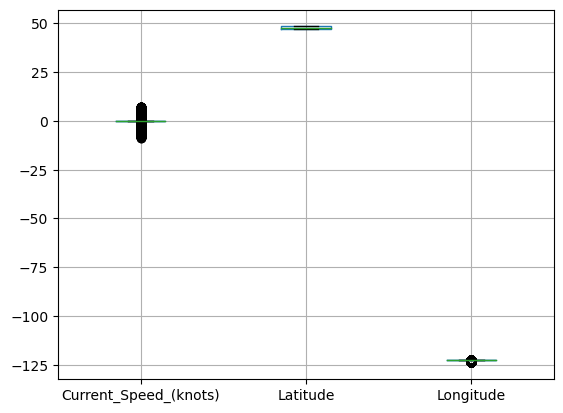

In [48]:
import matplotlib.pyplot as plt

# Visualize numeric columns for outliers
numeric_columns = ['Current_Speed_(knots)', 'Latitude', 'Longitude']
pugetsound_currents.boxplot(column=numeric_columns)
plt.show()

In [49]:
# Check for duplicates
print(pugetsound_currents.duplicated().sum())

0


In [50]:
# Check for missing values
print(pugetsound_currents.isnull().sum())

Dive_Site                0
Date                     0
Day_of_Week              0
Time                     0
Event                    0
Current_Speed_(knots)    0
Current_Station_Name     0
Current_Station_ID       0
Latitude                 0
Longitude                0
dtype: int64


In [51]:
# Check unique values in categorical columns for consistency
print(pugetsound_currents['Event'].unique())

[' slack' ' flood' ' ebb']


In [52]:
# Standardize naming (e.g., uppercase all station names)
pugetsound_currents['Current_Station_Name'] = pugetsound_currents['Current_Station_Name'].str.upper()


In [53]:
# Export deception_pass_currents dataset as pickle
pugetsound_currents.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'pugetsound_currents_clean.pkl'))

In [54]:
# Export deception_pass_currents dataset as pickle
pugetsound_currents.to_csv(os.path.join(path, '02 Data','Prepared Data', 'pugetsound_currents_clean.csv'))

In [55]:
pugetsound_currents.head()

,Dive_Site,Date,Day_of_Week,Time,Event,Current_Speed_(knots),Current_Station_Name,Current_Station_ID,Latitude,Longitude
0,Deception Pass,2024-01-01,Monday,00:48,slack,0.0,DECEPTION PASS NARROWS,PUG1701,48.405722,-122.6449
1,Deception Pass,2024-01-01,Monday,03:18,flood,4.0,DECEPTION PASS NARROWS,PUG1701,48.405722,-122.6449
2,Deception Pass,2024-01-01,Monday,06:42,slack,0.0,DECEPTION PASS NARROWS,PUG1701,48.405722,-122.6449
3,Deception Pass,2024-01-01,Monday,09:30,ebb,-5.3,DECEPTION PASS NARROWS,PUG1701,48.405722,-122.6449
4,Deception Pass,2024-01-01,Monday,13:42,slack,0.0,DECEPTION PASS NARROWS,PUG1701,48.405722,-122.6449


In [56]:
pugetsound_currents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Dive_Site              11000 non-null  object        
 1   Date                   11000 non-null  datetime64[ns]
 2   Day_of_Week            11000 non-null  object        
 3   Time                   11000 non-null  object        
 4   Event                  11000 non-null  object        
 5   Current_Speed_(knots)  11000 non-null  float64       
 6   Current_Station_Name   11000 non-null  object        
 7   Current_Station_ID     11000 non-null  object        
 8   Latitude               11000 non-null  float64       
 9   Longitude              11000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 859.5+ KB
